<a href="https://www.kaggle.com/code/vanpatangan/house-prices-tf-practice?scriptVersionId=217781733" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

#import tensorflow as tf
#import tensorflow_decision_forests as tfdf
from sklearn.preprocessing import LabelEncoder
#print(tf.__version__)

In [2]:
train=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

# Data Exploration

In [3]:
def check(df):
    """
    Generates a concise summary of DataFrame columns.
    """
    # Use list comprehension to iterate over each column
    summary = [[col, df[col].dtype, df[col].count(), df[col].nunique(), df[col].isnull().sum(), df.duplicated().sum()]
        for col in df.columns]

    # Create a DataFrame from the list of lists
    df_check = pd.DataFrame(summary, columns=["column", "dtype", "instances", "unique", "sum_null", "duplicates"])
    
    # Set pandas option to display all rows
    pd.set_option('display.max_rows', None)
    
    return df_check

In [4]:
check(train)

,column,dtype,instances,unique,sum_null,duplicates
0,Id,int64,1460,1460,0,0
1,MSSubClass,int64,1460,15,0,0
2,MSZoning,object,1460,5,0,0
3,LotFrontage,float64,1201,110,259,0
4,LotArea,int64,1460,1073,0,0
5,Street,object,1460,2,0,0
6,Alley,object,91,2,1369,0
7,LotShape,object,1460,4,0,0
8,LandContour,object,1460,4,0,0
9,Utilities,object,1460,2,0,0


In [7]:
check(test)

,column,dtype,instances,unique,sum_null,duplicates
0,Id,int64,1459,1459,0,0
1,MSSubClass,int64,1459,16,0,0
2,MSZoning,object,1455,5,4,0
3,LotFrontage,float64,1232,115,227,0
4,LotArea,int64,1459,1106,0,0
5,Street,object,1459,2,0,0
6,Alley,object,107,2,1352,0
7,LotShape,object,1459,4,0,0
8,LandContour,object,1459,4,0,0
9,Utilities,object,1457,1,2,0


## Distribution

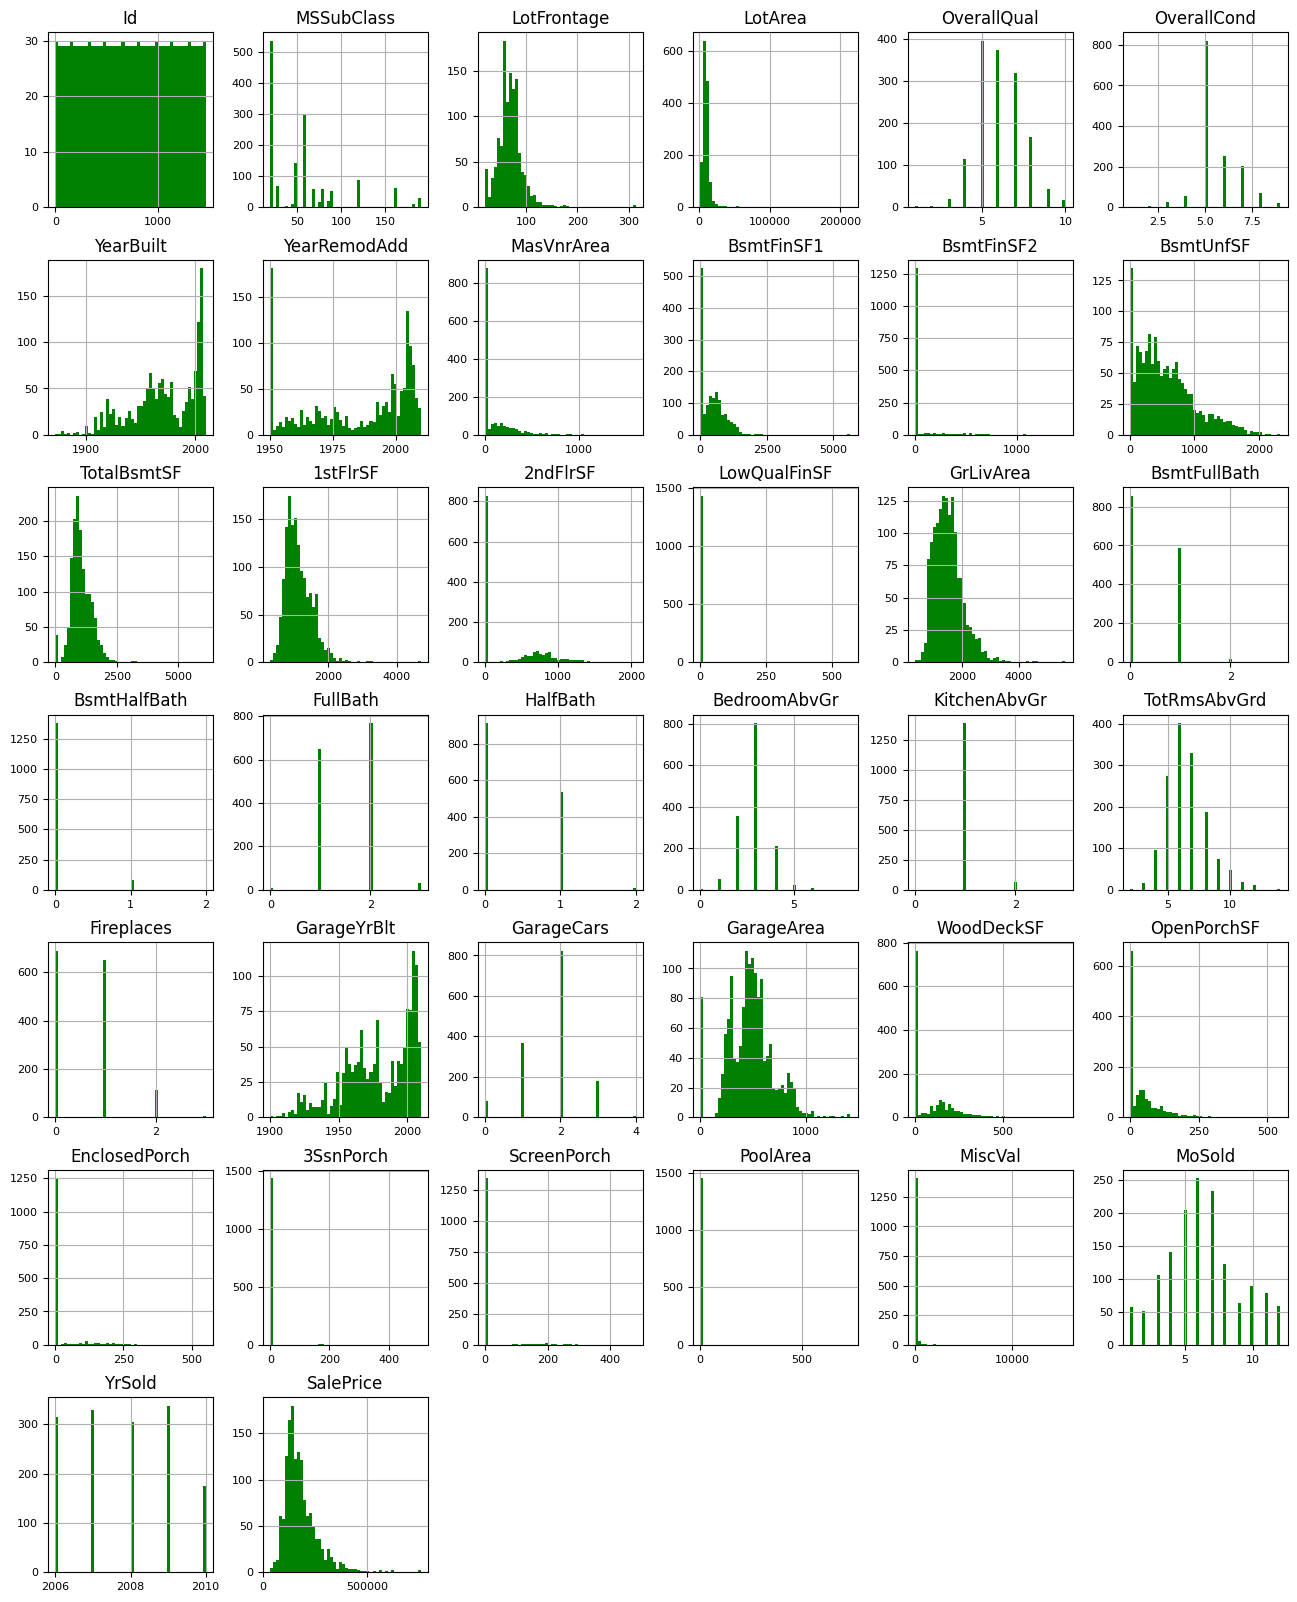

In [8]:
# Find all the Numeric Dtypes 
numeric_col = train.select_dtypes(include=['float64','int64'])

# Visualize to check distribution 
numeric_col.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8, color='g');

## Missing Values 

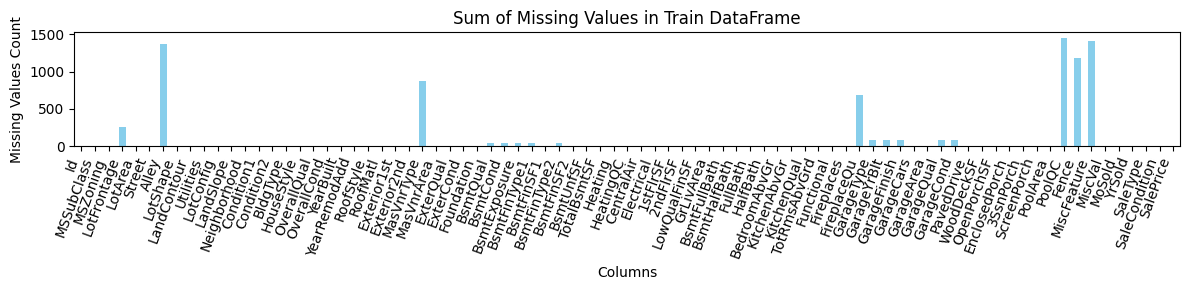

In [9]:
# Find missing values
missing_values = train.isnull().sum()

# Plot the sum of missing values
plt.figure(figsize=(12, 3))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Sum of Missing Values in Train DataFrame')
plt.xlabel('Columns')
plt.ylabel('Missing Values Count')
plt.xticks(rotation=70, ha='right')
plt.tight_layout()
plt.show()

## Correlation

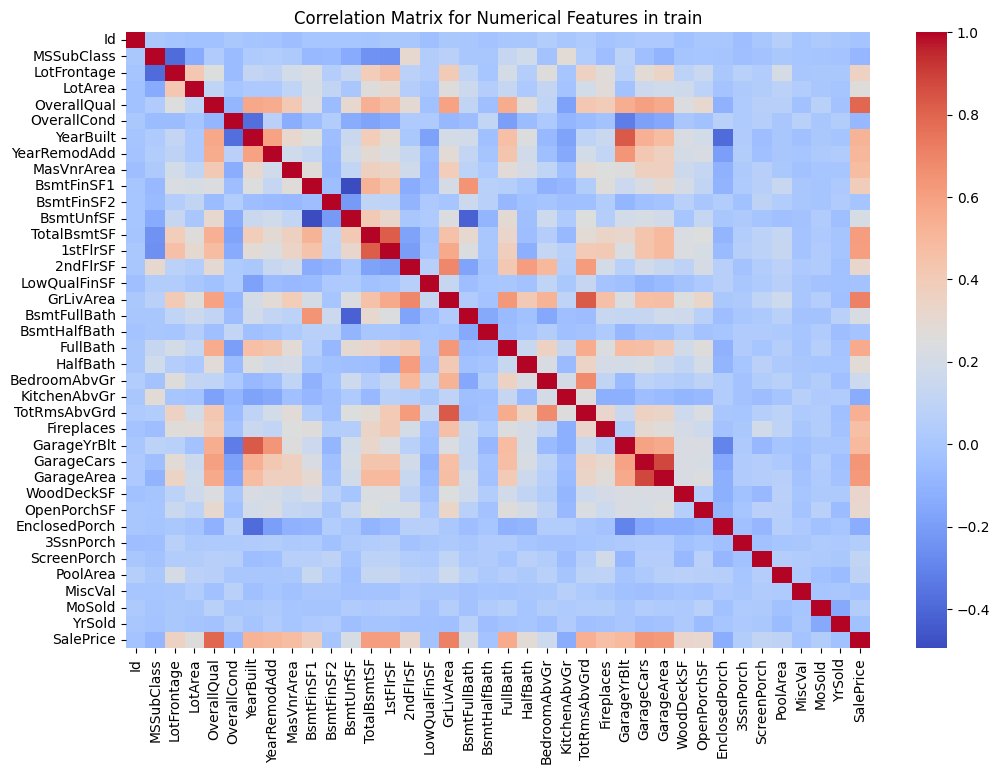

In [11]:
# Specify numerical columns in train
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix for numerical features only
corr_matrix = train[numerical_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Numerical Features in train")
plt.show()

In [13]:
# Sort the correlation matrix by correlation with the target column
target_column = 'SalePrice'  

# Sort the correlation values for the target column
sorted_correlations = corr_matrix[target_column].abs().sort_values(ascending=False)

print(sorted_correlations)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
MSSubClass       0.084284
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
Id               0.021917
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePr

In [16]:
# Filter low correlated columns 
correlation_threshold = 0.04
high_corr_features = sorted_correlations[sorted_correlations > correlation_threshold].index.tolist()
train_filtered = train[high_corr_features]

remaining_columns = train_filtered.shape[1]
print(f"Number of remaining columns after dropping low correlation features: {remaining_columns}")

Number of remaining columns after dropping low correlation features: 32


In [19]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Preprocess

In [ ]:
# drop id 
# 

In [ ]:
# Dropping unecessary column 
train_ds_pd = train.drop("Id", axis=1)

# Model

**Evaluation**

In [ ]:
# Generate a plot showing the model's RMSE performance during training
logs = rf.make_inspector().training_logs()
plt.plot([log.num_trees for log in logs], [log.evaluation.rmse for log in logs])
plt.xlabel("Number of trees")
plt.ylabel("RMSE (out-of-bag)") 
#OOB samples are the data points that are not included in the bootstrap sample used to train the model
plt.show()

In [ ]:
# Extract RMSE values from logs
rmse_values = [log.evaluation.rmse for log in logs]

# Calculate overall RMSE score
overall_rmse = sum(rmse_values) / len(rmse_values)

# Print overall RMSE score
print(f"Overall RMSE score: {overall_rmse}")

In [ ]:
# Calculate MSE from RMSE
mse = overall_rmse ** 2

# Print MSE
print(f"Overall MSE: {mse}")

In [ ]:
# Compare True vs Predicted Prices
comparison = train[["Id","SalePrice"]].copy()
comparison["PredictedPrice"] = pred
comparison.head()

In [ ]:
# Sort the DataFrame by "SalePrice" column
comparison.sort_values(by="SalePrice", inplace=True)

# Calculate minimum and maximum sale prices
min_price = comparison["SalePrice"].min()
max_price = comparison["SalePrice"].max()

# Generate a line from minimum to maximum sale prices
line = np.linspace(min_price, max_price)

# Plot true vs predicted prices
comparison.plot(x="SalePrice", y="PredictedPrice", kind='scatter', 
                use_index=False, title="True vs Predicted Prices")

# Plot the line y=x for comparison
plt.plot(line, line, c='red')

# Show the plot
plt.show()

In [ ]:
# Make the prediction
id = test.pop("Id")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, task = tfdf.keras.Task.REGRESSION)
pred = rf.predict(test_ds)

In [ ]:
submit_data = pd.DataFrame({'Id': id,
                           "SalePrice": pred.squeeze()})

submit_data.head()

In [ ]:
# Compare the training data and predicted prices from the test data
fig, ax = plt.subplots(2, figsize=(12,6))
train.plot(x="Id", y="SalePrice", ax=ax[0], title="Prices From Training Data", color='green')
submit_data.plot(x="Id", y="SalePrice", ax=ax[1], title="Prices From Model's Prediction", color='green')
ax[0].set_ylabel("SalePrice")
ax[1].set_ylabel("SalePrice")
ax[0].set_xlabel("Id")
ax[1].set_xlabel("Id")
plt.tight_layout()
plt.show()

In [ ]:
# Save the submission DataFrame to a CSV file
submit_data.to_csv("submission.csv", index=False)